# Loan approval Project

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features.

In [1]:
# import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import data
df=pd.read_csv('loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
# check columns
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
# Rename column
df.rename(columns={' loan_status':'loan'},inplace=True)

In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', 'loan'],
      dtype='object')

In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
# taking information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12  loan                       4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
# check null value
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
loan                         0
dtype: int64

In [9]:
#checking duplicates
df.duplicated(keep=False).sum()

0

In [10]:
# abs() function return the absolute value and is always positive it removes the negative sign of a number in Python. 

df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()  #

0

In [11]:
# Removing white spaces in column names and all values
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

C:\Users\vivek\AppData\Local\Temp\ipykernel_8264\1733583529.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan                      4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [13]:
#describe function
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [14]:
# select integer type data
t=df.select_dtypes(['int'])
t

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


0 describes no.of approved loans and 1 describes no.of rejected loans

In [15]:
t.corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020953,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007390,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636824,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594582,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008008,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019907,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020953,0.007390,0.636824,0.594582,0.008008,-0.019907,1.000000,0.414799,0.590919,0.527401
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414799,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590919,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527401,0.548576,0.788517,1.000000


# Exploratory Data Analysis and Visualization

In [16]:
#Grouping customers according to income levels
income = df['income_annum'].value_counts().reset_index()
Income = income.rename(columns={'count':'Number of Applicants'})
Income

,income_annum,Number of Applicants
0,7000000,62
1,4100000,59
2,7600000,57
3,4700000,56
4,6900000,55
...,...,...
93,3600000,33
94,3400000,33
95,9300000,33
96,8500000,32


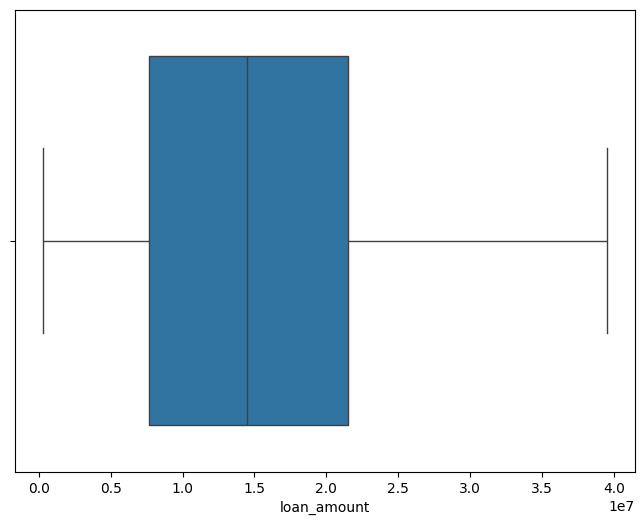

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(df,x="loan_amount")
plt.show()

       loan  Number of Applicants
0  Approved                  2656
1  Rejected                  1613


C:\Users\vivek\AppData\Local\Temp\ipykernel_8264\490753997.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="loan",data=df, palette = "Set2")


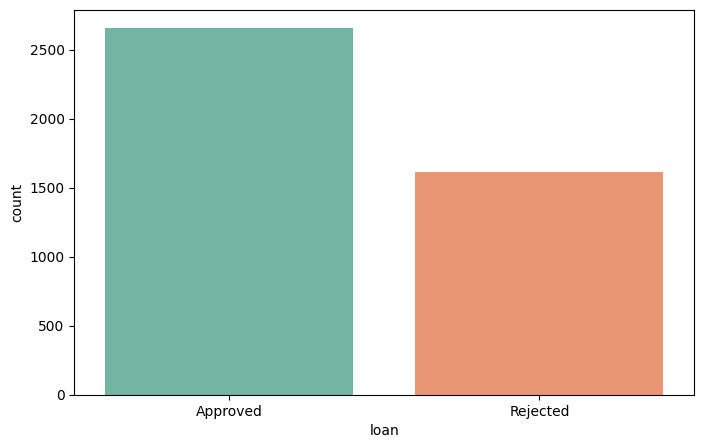

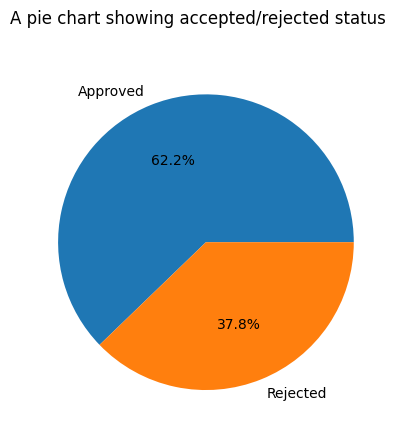

In [18]:
## Overall Rate
loan = df['loan'].value_counts().reset_index()
loans = loan.rename(columns={'count':'Number of Applicants'})
print("="*40)
print(loans)
print("="*40)

#plotting a pie plot
plt.figure(figsize=(8,5))
sns.countplot(x="loan",data=df, palette = "Set2")
plt.show()

plt.pie(loans['Number of Applicants'],labels=loans['loan'],autopct='%1.1f%%')
plt.suptitle('A pie chart showing accepted/rejected status')
plt.show()

      education      loan     0
0      Graduate  Approved  1339
1      Graduate  Rejected   805
2  Not Graduate  Approved  1317
3  Not Graduate  Rejected   808


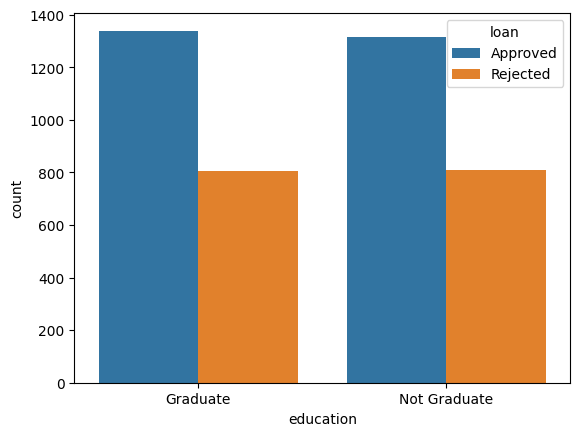

In [19]:
#loan approvals according to education
education = df.groupby(['education','loan']).size().reset_index()
print("="*40)
print(education)
print("="*40)
sns.countplot(df, x="education", hue="loan")
plt.show()

This shows education doesn't effect the loan approval status

  self_employed  Number of Applicants
0           Yes                  2150
1            No                  2119 


  self_employed      loan  Total
0            No  Approved   1318
1            No  Rejected    801
2           Yes  Approved   1338
3           Yes  Rejected    812


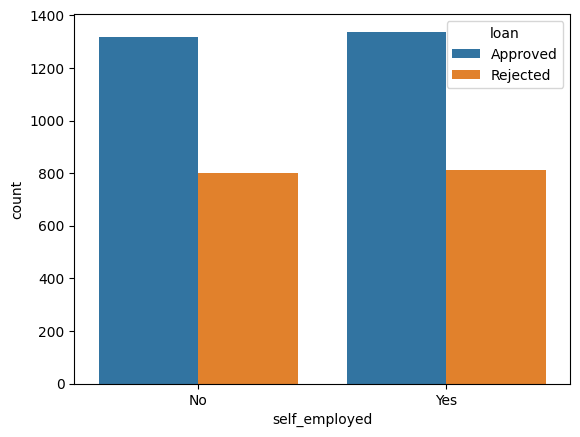

In [20]:
# Number of Employed or Not
print("="*40)
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'count':'Number of Applicants'})
print(employment,"\n")
print("="*40,"\n")

#loan apprrovals according to employment

employment_type = df.groupby(['self_employed','loan']).size().reset_index()
employment_type = employment_type[employment_type['loan'].isin(['Approved','Rejected'])]
employment_type = employment_type.rename(columns = {0:'Total'})
print("="*40)
print(employment_type)
print("="*40)


sns.countplot(df, x="self_employed", hue="loan")
plt.show()

This shows employment doesn't effect the loan approval status

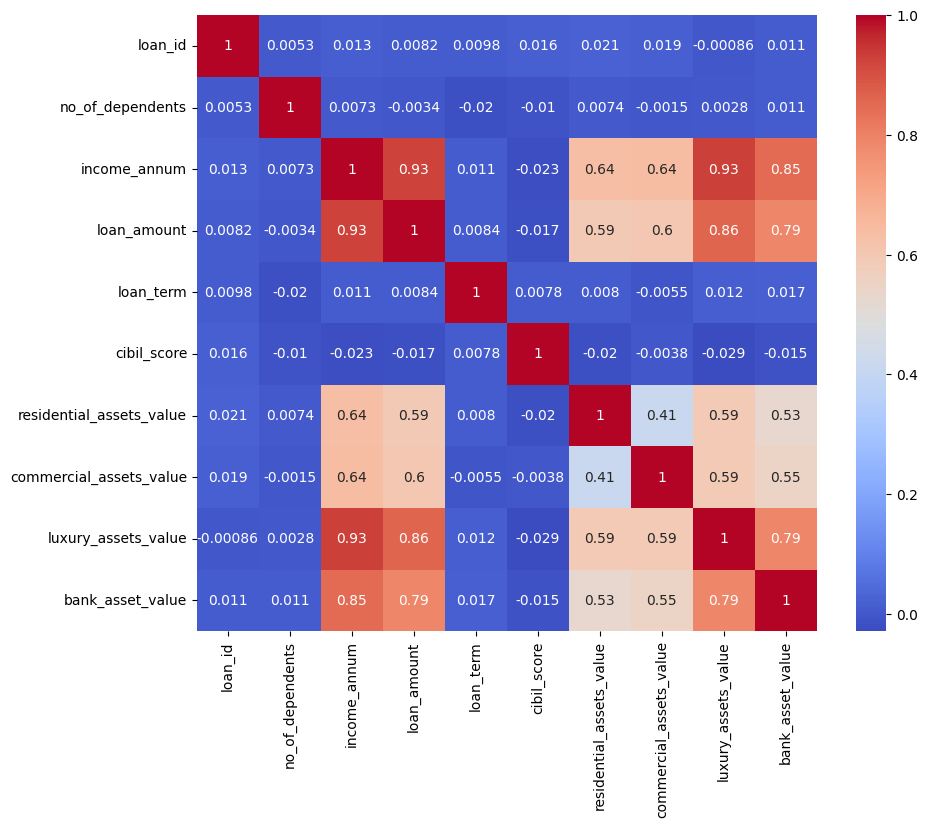

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(t.corr(), cmap="coolwarm", annot=True)
plt.show()

 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =


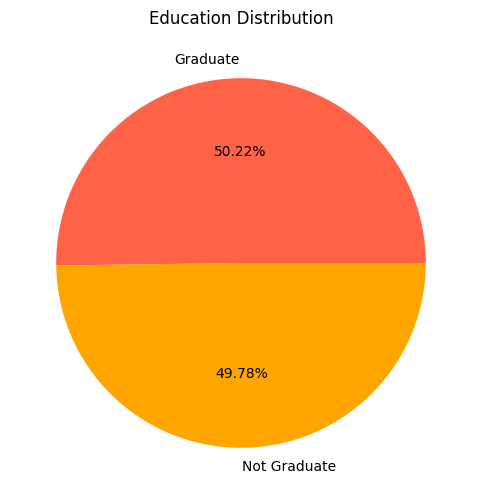

In [22]:
education_counts = df['education'].value_counts()
education_counts.reset_index()
print(" ="*30)
print(education_counts)
print(" ="*30)

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', colors=['tomato', 'orange'])
plt.title('Education Distribution')
plt.show()

C:\Users\vivek\AppData\Local\Temp\ipykernel_8264\2015351292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(t,x = 'no_of_dependents',palette = "magma").set_title('Number of Dependents')


Text(0.5, 1.0, 'Number of Dependents')

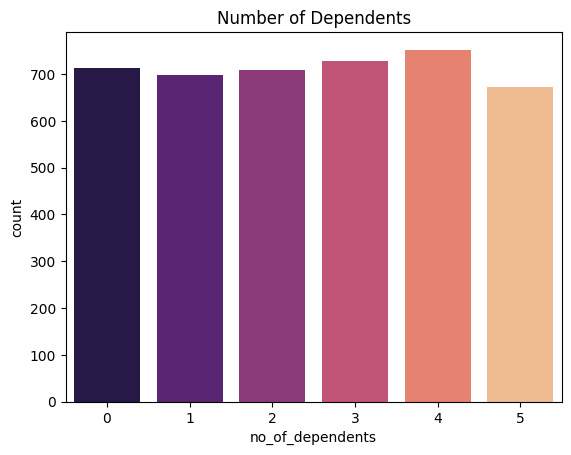

In [23]:
import seaborn as sns
sns.countplot(t,x = 'no_of_dependents',palette = "magma").set_title('Number of Dependents')

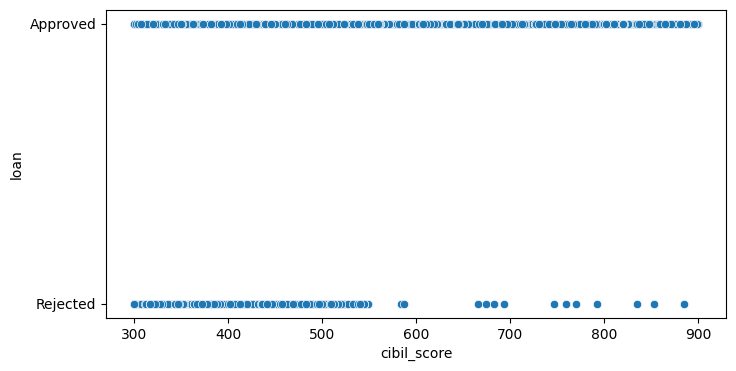

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='cibil_score',y='loan',data=df)
plt.show()

There are some outliers for rejected loan applications despite of having high cibil score. But loans were approved with cibil scores ranging from 300-900.

In [25]:
#adding of the cibil rating column
def cibil_rating(value):
    if 300 <= value <= 549:
        return 'Poor'
    if 550 <= value <= 649:
        return 'Average'
    if 650 <= value <= 749:
        return 'Good'
    if 750 <= value <= 900:
        return 'Excellent'
    else:
        return'Error'
    
df['CB_Rating'] = df['cibil_score'].apply(cibil_rating)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan,CB_Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor


In [26]:
#group data according to CIBIL Rating

cibil_rates = df.groupby(['CB_Rating','loan']).size().reset_index()
cibil_rates = cibil_rates.rename(columns={0:'Totals'})
cibil_rates

,CB_Rating,loan,Totals
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


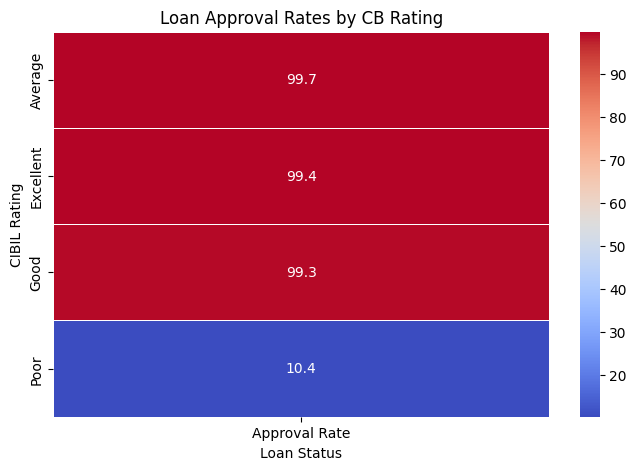

In [27]:
#pivot table
pivot_table = cibil_rates.pivot_table(index='CB_Rating',columns='loan',values = 'Totals')

#calculating the approval rates
pivot_table['Approval Rate'] = pivot_table['Approved']/(pivot_table['Approved'] + pivot_table['Rejected']) * 100


#create a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']],annot=True, fmt='.1f',cmap='coolwarm',linewidth=0.5)

plt.title('Loan Approval Rates by CB Rating')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Rating')

plt.show()

# Split Dataset for Training and Testing

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() # string to int (0 or 1)

In [29]:
# level encoding loan column
df['loan']=encoder.fit_transform(df.loan)

In [30]:
# select integer type data
t=df.select_dtypes(['int'])
t

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [31]:
# input or feature data
x=t.iloc[0:,1:10] # 0: define all rows and 1:10 column select 
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [32]:
y=t.iloc[0:,-1]
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name: loan, Length: 4269, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# ----------  Model Building  ----------

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
regpred = reg.predict(x_test)
regpred

array([0, 0, 1, ..., 0, 1, 0])

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       659
           1       0.82      0.42      0.56       409

    accuracy                           0.74      1068
   macro avg       0.77      0.68      0.69      1068
weighted avg       0.76      0.74      0.72      1068



In [39]:
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

Accuracy of Logistic Regression is :  74.43820224719101


In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.2556179775280899
Mean Squared Error :  0.2556179775280899
Root Mean Squared Error :  0.5055867655784613
R2 Score :  -0.08174569901050366


In [42]:
# verifying loan approval with sample data [output 0 is for approved]
y_pred_approve=reg.predict([[0,9200000,23900000,8,789,18200000,17600000,22700000,12800000]])
y_pred_approve

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [43]:
# verifying ;oan rejection with sample data [output 1 is for rejection]
y_pred_reject=reg.predict([[1,1000,1000000,20,120,1000,1000,1000,2000]])
y_pred_reject

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

This model predict loan is approved but Decision tree and Random Forest Tree predict loan is not approved so,this model have low accuracy

# Decision Tree

In [44]:
from sklearn import tree

In [45]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
dtreepred = dtree.predict(x_test)
dtreepred

array([0, 0, 0, ..., 0, 1, 0])

In [47]:
print(classification_report(y_test,dtreepred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       659
           1       0.96      0.96      0.96       409

    accuracy                           0.97      1068
   macro avg       0.97      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068



In [48]:
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

Accuracy of Decision Tree is :  97.09737827715355


In [49]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.02902621722846442
Mean Squared Error :  0.02902621722846442
Root Mean Squared Error :  0.1703708227029042
R2 Score :  0.8771644078046681


In [50]:
# verifying loan approval with sample data [output 0 is for approved]
y_pred_approve=dtree.predict([[0,9200000,23900000,8,789,18200000,17600000,22700000,12800000]])
y_pred_approve

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [51]:
# verifying ;oan rejection with sample data [output 1 is for rejection]
y_pred_reject=dtree.predict([[1,1000,1000000,20,120,1000,1000,1000,2000]])
y_pred_reject

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

# Random Forest

Random Forest: collection of decision tree,it is best for classification or accuracy purpose.if we cannot mention number of DT, by default works on 100 tree

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
cls=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0) # bydefault sample 100

In [54]:
cls.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [55]:
estimator = cls.estimators_[0]

In [56]:
y_pred=cls.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

confusion Matrix:
 [[655   4]
 [ 10 399]]


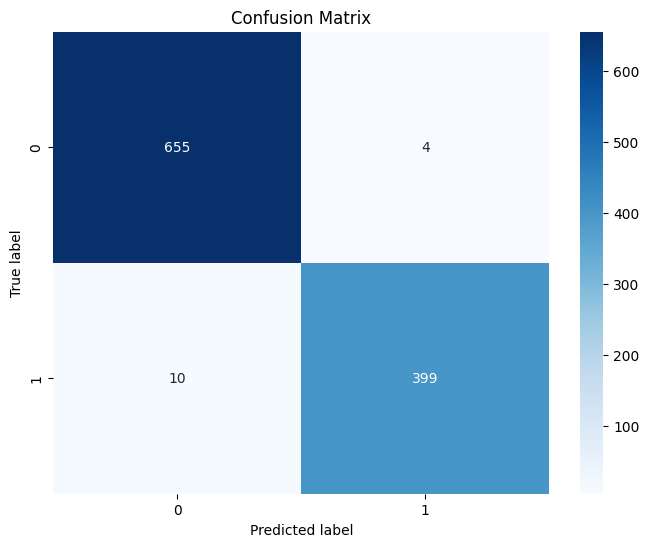

In [57]:
from sklearn.metrics import confusion_matrix

results=confusion_matrix(y_test,y_pred)
print('confusion Matrix:\n',results)

plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues') # annot=True: Annotates each cell with the numeric value, fmt='d': Formats the annotations as integers, cmap='red': Specifies the colormap to use (blue shades)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [58]:
# Accuracy of prediction
from sklearn.metrics import accuracy_score
IntAccuracy=accuracy_score(y_test,y_pred)
IntAccuracyfinal=IntAccuracy*100
print('Accuracy score:',IntAccuracy)
print('Accuracy score:',IntAccuracyfinal,"%")

Accuracy score: 0.9868913857677902
Accuracy score: 98.68913857677903 %


In [59]:
import matplotlib.pyplot as plt
from sklearn import tree

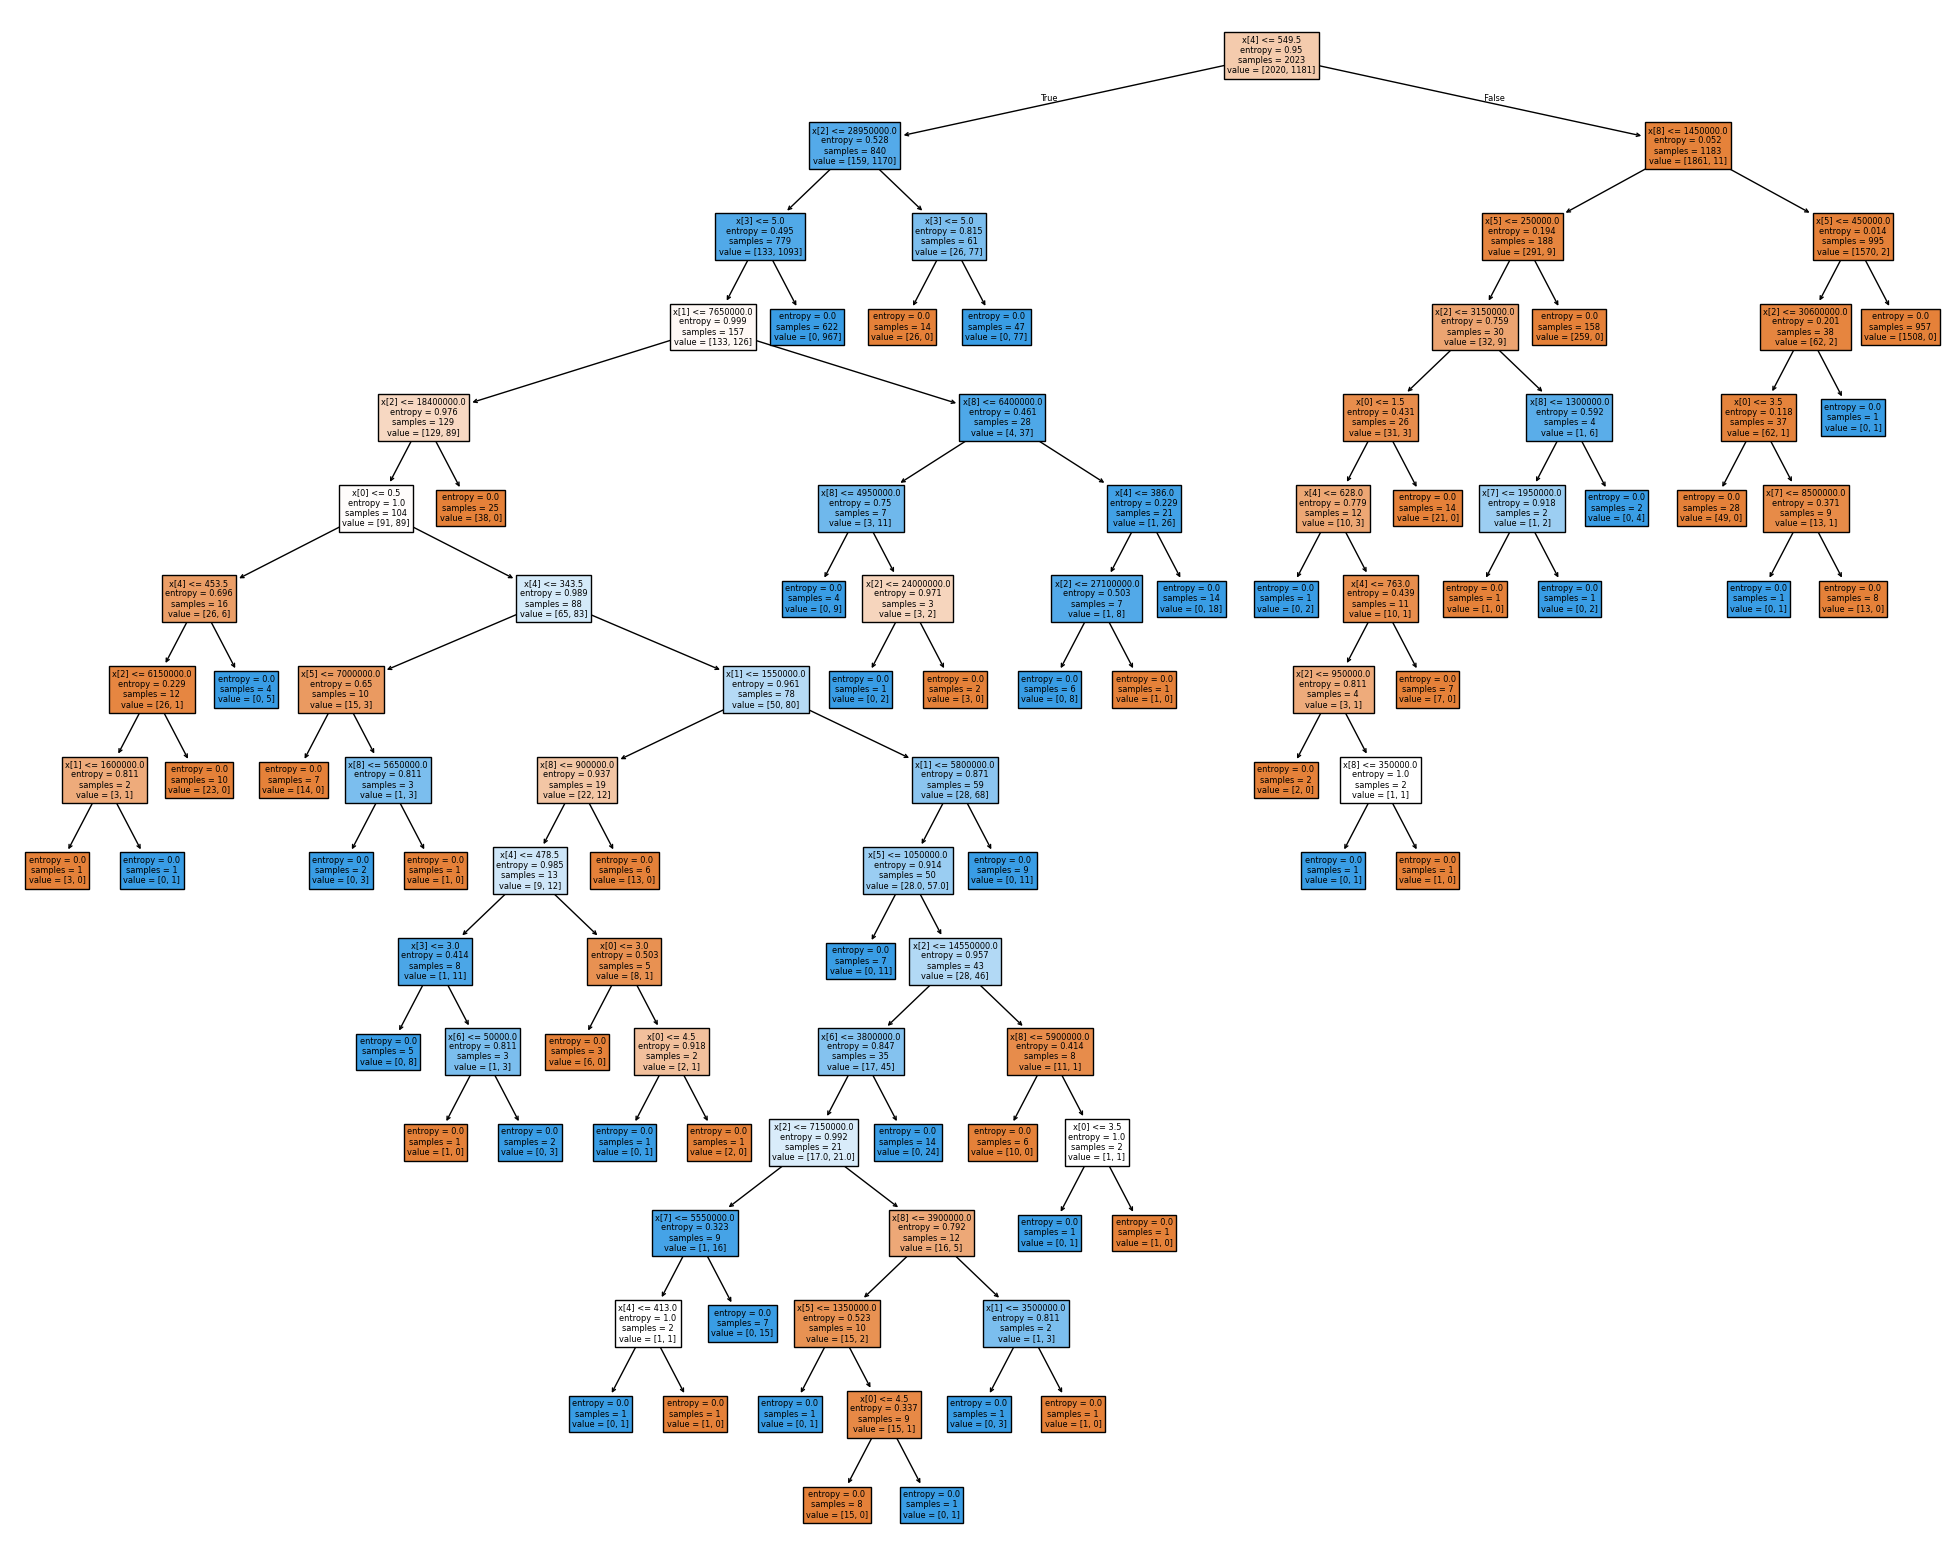

In [60]:
fig = plt.figure(figsize=(25, 20))
k= tree.plot_tree(estimator, filled=True)
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

Mean Absolute Error :  0.013108614232209739
Mean Squared Error :  0.013108614232209739
Root Mean Squared Error :  0.11449285668638781
R2 Score :  0.9445258615892049


In [63]:
# verifying loan approval with sample data [output 0 is for approved]
y_pred_approve=cls.predict([[0,9200000,23900000,8,789,18200000,17600000,22700000,12800000]])
y_pred_approve

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [64]:
# verifying ;oan rejection with sample data [output 1 is for rejection]
y_pred_reject=cls.predict([[1,1000,1000000,20,120,1000,1000,1000,2000]])
y_pred_reject

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

# Feature Importance

In [65]:
importances = cls.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                    feature  importance
4               cibil_score    0.798722
3                 loan_term    0.082501
2               loan_amount    0.030424
5  residential_assets_value    0.019592
1              income_annum    0.018325
7       luxury_assets_value    0.016156
6   commercial_assets_value    0.015298
8          bank_asset_value    0.012615
0          no_of_dependents    0.006366


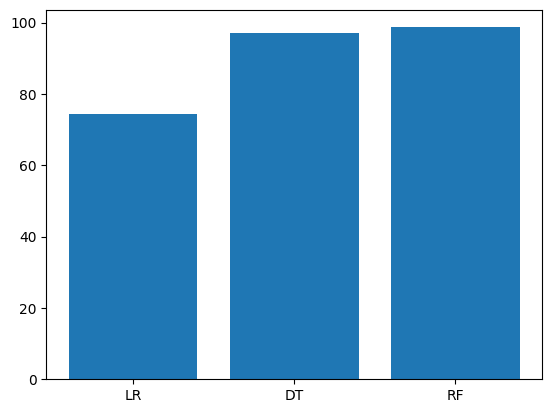

In [66]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,y_pred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

Random forest give the highest accuracy 

#  Creating Pickle File 

In [67]:
import pickle  # file is used to save the file
pickle.dump(cls,open("E:/Ducat/machine learning/loanprediction","wb"))
model=pickle.load(open("E:/Ducat/machine learning/loanprediction","rb"))

# GUI using Tkinter

In [68]:
# sample tkinter GUI for loan approval/rejection prediction and this gui is based on Random forest algorithm

from tkinter import *
from tkinter import ttk
from tkinter import messagebox

top=Tk()
top.geometry('700x700')
top.title ('loan approval prediction')

def funloanapproval():
    strEducation = cmbEducation.get()
    if (strEducation == 'Graduate'):
        intEducation = 0 
    else:
        intEducation = 1
    
    strselEmployed = cmbEmployment.get()
    if (strselEmployed == 'No'):
        IntEmployed = 0 
    else:
        IntEmployed = 1
        
    print(IntEmployed)
    
    y_pred = cls.predict([[enDependent.get(), enAnnualIncome.get(), enLoanAmount.get(), enLoanTerm.get(), enCibilscore.get(), enRessidentalAsset.get(), enCommercialAsset.get(), enLuxeryAsset.get(), enBankAsset.get()]])
    
    if y_pred == 0:
        enpredResults.insert(END, "Loan will be approved")
    else:
        enpredResults.insert(END, "Loan will be Rejected")
    
    strAccuracy = '{0:.2f}'.format(IntAccuracyfinal),'%'
    enModelAccuracy.insert(END, strAccuracy)
    
lblHeader=Label(top,text="Loan Approval Prediction",bg="orange",fg="white",font=("Arial 10 bold"))
lblHeader.place(x=200,y=20)

    
lblDependent=Label(top,text="No of dependents",bg="orange",fg="white",font=("Arial 10 bold"))
lblDependent.place(x=200,y=120)

enDependent=Entry(top,font=("Arial 10 bold"))
enDependent.place(x=400,y=120)

    
lblEducation=Label(top,text="Education",bg="orange",fg="white",font=("Arial 10 bold"))
lblEducation.place(x=200,y=160)

lsEducation=['Graduate','Non-Graduate']
cmbEducation=ttk.Combobox(top,values=lsEducation)
cmbEducation.place(x=400,y=160)
cmbEducation.current(0)


lblEmployment=Label(top,text=" Self Employed",bg="orange",fg="white",font=("Arial 10 bold"))
lblEmployment.place(x=200,y=200)

lsEmployment=['Yes','No']
cmbEmployment=ttk.Combobox(top,values=lsEmployment)
cmbEmployment.place(x=400,y=200)
cmbEmployment.current(0)


lblAnnualIncome=Label(top,text=" Annual Income",bg="orange",fg="white",font=("Arial 10 bold"))
lblAnnualIncome.place(x=200,y=240)

enAnnualIncome=Entry(top,font=("Arial 10 bold"))
enAnnualIncome.place(x=400,y=240)


lblLoanAmount=Label(top,text="Loan Amount",bg="orange",fg="white",font=("Arial 10 bold"))
lblLoanAmount.place(x=200,y=280)

enLoanAmount=Entry(top,font=("Arial 10 bold"))
enLoanAmount.place(x=400,y=280)



lblLoanTerm=Label(top,text="Loan Term",bg="orange",fg="white",font=("Arial 10 bold"))
lblLoanTerm.place(x=200,y=320)

enLoanTerm=Entry(top,font=("Arial 10 bold"))
enLoanTerm.place(x=400,y=320)



lblCibilScore=Label(top,text="Cibil Score",bg="orange",fg="white",font=("Arial 10 bold"))
lblCibilScore.place(x=200,y=360)

enCibilscore=Entry(top,font=("Arial 10 bold"))
enCibilscore.place(x=400,y=360)


lblRessidentalAsset=Label(top,text="Residential Asset value",bg="orange",fg="white",font=("Arial 10 bold"))
lblRessidentalAsset.place(x=200,y=400)

enRessidentalAsset=Entry(top,font=("Arial 10 bold"))
enRessidentalAsset.place(x=400,y=400)



lblCommAsset=Label(top,text="Commercial Asset Value",bg="orange",fg="white",font=("Arial 10 bold"))
lblCommAsset.place(x=200,y=440)

enCommercialAsset=Entry(top,font=("Arial 10 bold"))
enCommercialAsset.place(x=400,y=440)


lblLuxeryAsset=Label(top,text="Luxery Asset Value",bg="orange",fg="white",font=("Arial 10 bold"))
lblLuxeryAsset.place(x=200,y=480)

enLuxeryAsset=Entry(top,font=("Arial 10 bold"))
enLuxeryAsset.place(x=400,y=480)


lblBankAsset=Label(top,text="Bank Asset ",bg="orange",fg="white",font=("Arial 10 bold"))
lblBankAsset.place(x=200,y=520)

enBankAsset=Entry(top,font=("Arial 10 bold"))
enBankAsset.place(x=400,y=520)


btnsubmit=Button(top,text='predict',bg='lime green',fg='white',font=("Arial 20 bold"),command= lambda:funloanapproval() )
btnsubmit.place(x=300,y=550)



lblpredResults=Label(top,text="Prediction Results",bg="orange",fg="white",font=("Arial 10 bold"))
lblpredResults.place(x=200,y=620)

enpredResults=Text(height=1,width=30,fg='black',font=("Arial 10 bold"))
enpredResults.place(x=350,y=620)


lblModelAccuracy=Label(top,text="Prediction Model Accuracy",bg="orange",fg="white",font=("Arial 10 bold"))
lblModelAccuracy.place(x=200,y=660)

enModelAccuracy=Text(height=1,width=30,fg='black',font=("Arial 10 bold"))
enModelAccuracy.place(x=400,y=660)

top.config(bg='teal')
top.mainloop()

1


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1


C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [69]:
import numpy as np

In [70]:
k=np.array([[1,1000,1000000,20,120,1000,1000,1000,2000]])
k

array([[      1,    1000, 1000000,      20,     120,    1000,    1000,
           1000,    2000]])

In [71]:
model.predict(k)

C:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])